# Prosper Loan Data Exploration
## by Chimamaka Chilaka

## Introduction
This document explores a dataset containing about 114,000 rows of data on loans and includes details such as borrower rates(interest rate), borrower income and many others.

For more understanding of the different variable in the dataset, you can check at this [Link](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

## Table Of Contents




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Overview of the shape and composition of the dataset
print(loan_df.shape)
print(loan_df.dtypes)
print(loan_df.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [4]:
# overview of column names
loan_df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

Out of the 113937 rows and 81 columns, the below 18 columns were selected for exploration.

In [5]:
# subsetting the data for the columns that i will be needing for exploration out of the 81 columns.
df_loan_sub = loan_df.loc[:, ['ListingNumber','Term', 'LoanStatus', 'IncomeRange',
             'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
             'EmploymentStatus', 'EmploymentStatusDuration', 'DebtToIncomeRatio', 'IsBorrowerHomeowner',
             'StatedMonthlyIncome', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment']]

## Assess 

In [6]:
# checking the first few rows
df_loan_sub.head()

,ListingNumber,Term,LoanStatus,IncomeRange,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,DebtToIncomeRatio,IsBorrowerHomeowner,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment
0,193129,36,Completed,"$25,000-49,999",NaN,NaN,0,CO,Other,Self-employed,2.0,0.17,True,3083.333333,9425,2007-09-12 00:00:00,Q3 2007,330.43
1,1209647,36,Current,"$50,000-74,999",A,7.0,2,CO,Professional,Employed,44.0,0.18,False,6125.000000,10000,2014-03-03 00:00:00,Q1 2014,318.93
2,81716,36,Completed,Not displayed,NaN,NaN,0,GA,Other,Not available,NaN,0.06,False,2083.333333,3001,2007-01-17 00:00:00,Q1 2007,123.32
3,658116,36,Current,"$25,000-49,999",A,9.0,16,GA,Skilled Labor,Employed,113.0,0.15,True,2875.000000,10000,2012-11-01 00:00:00,Q4 2012,321.45
4,909464,36,Current,"$100,000+",D,4.0,2,MN,Executive,Employed,44.0,0.26,True,9583.333333,15000,2013-09-20 00:00:00,Q3 2013,563.97


In [7]:
df_loan_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   IncomeRange                113937 non-null  object 
 4   ProsperRating (Alpha)      84853 non-null   object 
 5   ProsperScore               84853 non-null   float64
 6   ListingCategory (numeric)  113937 non-null  int64  
 7   BorrowerState              108422 non-null  object 
 8   Occupation                 110349 non-null  object 
 9   EmploymentStatus           111682 non-null  object 
 10  EmploymentStatusDuration   106312 non-null  float64
 11  DebtToIncomeRatio          105383 non-null  float64
 12  IsBorrowerHomeowner        113937 non-null  bool   
 13  StatedMonthlyIncome        11

In [8]:
df_loan_sub.duplicated().sum()

0

In [9]:
df_loan_sub.isnull().sum()

ListingNumber                    0
Term                             0
LoanStatus                       0
IncomeRange                      0
ProsperRating (Alpha)        29084
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
EmploymentStatusDuration      7625
DebtToIncomeRatio             8554
IsBorrowerHomeowner              0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
LoanOriginationQuarter           0
MonthlyLoanPayment               0
dtype: int64

In [10]:
# getting the unique value in loan status
df_loan_sub.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [11]:
df_loan_sub.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

In [12]:
df_loan_sub['ListingCategory (numeric)'].value_counts()

1     58308
0     16965
7     10494
2      7433
3      7189
6      2572
4      2395
13     1996
15     1522
18      885
14      876
20      771
19      768
5       756
16      304
11      217
8       199
10       91
9        85
12       59
17       52
Name: ListingCategory (numeric), dtype: int64

### Assessments

>1. Missing values in ProspeRating  (Alpha), ProsperScore, BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, DebtToIncomeRatio.
>2. Converting Occupation, BorrowerState, ListingCategory (numeric), EmploymentStatus, ProsperRating, ProsperScore, IncomeRange to Categorical variable, ListingNumber to string and LoanOriginationDate to datetime(Extract year, month, day and time)
>3. Round StatedMonthlyIncome to the nearest whole number(amount in dollars)

### Clean

In [16]:
# Creating a copy of the dataset to clean.
df_loan_clean = df_loan_sub.copy()

#### Issue 1

In [17]:
# Filtering for only where ProsperRating is not null
df_loan_clean = df_loan_clean[df_loan_clean['ProsperRating (Alpha)'].notnull()]

In [18]:
df_loan_clean = df_loan_clean[df_loan_clean['EmploymentStatusDuration'].notnull()]

In [19]:
df_loan_clean = df_loan_clean[df_loan_clean['DebtToIncomeRatio'].notnull()]

In [21]:
# Test
df_loan_clean['ProsperRating (Alpha)'].isnull().sum()

0

In [22]:
df_loan_clean['EmploymentStatusDuration'].isnull().sum()

0

In [24]:
df_loan_clean['DebtToIncomeRatio'].isnull().sum()

0

#### Issue 2

In [25]:
from datetime import datetime

In [27]:
# Adjust datetime column
df_loan_clean['LoanOriginationDate'] = pd.to_datetime(df_loan_clean['LoanOriginationDate'])

In [28]:
df_loan_clean['LoanOriginationYear'] = df_loan_clean['LoanOriginationDate'].dt.year
df_loan_clean['LoanOriginationMonth'] = df_loan_clean['LoanOriginationDate'].dt.month
df_loan_clean['LoanOriginationTime'] = df_loan_clean['LoanOriginationDate'].dt.time

In [31]:
df_loan_clean = df_loan_clean.drop(['LoanOriginationDate'], axis=1)

In [32]:
df_loan_clean['LoanOriginationMonth'] = df_loan_clean['LoanOriginationMonth'].replace([1,2,3,4,5,6,7,8,9,10,11,12],
                                    ['January', 'Febuary','March','April','May','June','July','August','September','October','November','December'])

In [33]:
#Test
df_loan_clean['LoanOriginationMonth'].value_counts()

January      8468
October      8096
December     8078
November     7444
Febuary      7127
September    6314
August       6082
July         5803
March        5471
June         5415
May          4856
April        4389
Name: LoanOriginationMonth, dtype: int64

#### Issue 3

In [34]:
# round statedmonthlyincome to the nearest whole number
df_loan_clean['StatedMonthlyIncome'] = df_loan_clean['StatedMonthlyIncome'].round(decimals=0)

In [35]:
# test
df_loan_clean['StatedMonthlyIncome'].value_counts()

4167.0     2429
5000.0     2307
3333.0     1916
5833.0     1830
5417.0     1770
           ... 
8653.0        1
36250.0       1
1602.0        1
2166.0        1
18756.0       1
Name: StatedMonthlyIncome, Length: 6255, dtype: int64

#### Issue 4

In [36]:
# converting to categorical variable
ordinal_var_dict = {'LoanStatus': ['Cancelled',  'Chargedoff', 'Completed', 'Current', 'Defaulted', 'FinalPaymentInProgress'
                                   ,'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)',
                                   'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'],
                    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                    'ProsperScore': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                   'LoanOriginationMonth': ['January','Febuary', 'March','April','May','June','July','August','September',
                                            'October','November','December'],
                   'LoanOriginationYear' : [2009, 2010, 2011, 2012, 2013, 2014],
                   'IncomeRange' : ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                                   '$75,000-99,999','$100,000+']}
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, 
                                                categories=ordinal_var_dict[var])
    df_loan_clean[var] = df_loan_clean[var].astype(ordered_var)

In [38]:
# converting to right datatypes
df_loan_clean['ListingNumber'] = df_loan_clean['ListingNumber'].astype(str)
df_loan_clean['ListingCategory (numeric)'] = df_loan_clean['ListingCategory (numeric)'].astype('category')
df_loan_clean.EmploymentStatus = df_loan_clean.EmploymentStatus.astype('category')

In [39]:
#test
df_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ListingNumber              77543 non-null  object  
 1   Term                       77543 non-null  int64   
 2   LoanStatus                 77543 non-null  category
 3   IncomeRange                77543 non-null  category
 4   ProsperRating (Alpha)      77543 non-null  category
 5   ProsperScore               77543 non-null  category
 6   ListingCategory (numeric)  77543 non-null  category
 7   BorrowerState              77543 non-null  object  
 8   Occupation                 76216 non-null  object  
 9   EmploymentStatus           77543 non-null  category
 10  EmploymentStatusDuration   77543 non-null  float64 
 11  DebtToIncomeRatio          77543 non-null  float64 
 12  IsBorrowerHomeowner        77543 non-null  bool    
 13  StatedMonthlyIncome        775

In [40]:
# saving to a csv file
df_loan_clean.to_csv('Loan_data.csv')

#### Overview of Subsetted data

In [42]:
df_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77543 entries, 1 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   ListingNumber              77543 non-null  object  
 1   Term                       77543 non-null  int64   
 2   LoanStatus                 77543 non-null  category
 3   IncomeRange                77543 non-null  category
 4   ProsperRating (Alpha)      77543 non-null  category
 5   ProsperScore               77543 non-null  category
 6   ListingCategory (numeric)  77543 non-null  category
 7   BorrowerState              77543 non-null  object  
 8   Occupation                 76216 non-null  object  
 9   EmploymentStatus           77543 non-null  category
 10  EmploymentStatusDuration   77543 non-null  float64 
 11  DebtToIncomeRatio          77543 non-null  float64 
 12  IsBorrowerHomeowner        77543 non-null  bool    
 13  StatedMonthlyIncome        775

In [43]:
df_loan_clean.describe()

,Term,EmploymentStatusDuration,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000
mean,42.724630,104.240757,0.258739,5963.475646,9269.504688,295.759460
std,11.712344,96.790960,0.318347,5082.340437,6398.196398,189.326004
min,12.000000,0.000000,0.000000,0.000000,1000.000000,0.000000
25%,36.000000,31.000000,0.150000,3533.000000,4000.000000,158.490000
50%,36.000000,75.000000,0.220000,5000.000000,8000.000000,256.390000
75%,60.000000,149.000000,0.320000,7167.000000,14500.000000,392.280000
max,60.000000,755.000000,10.010000,483333.000000,35000.000000,2251.510000


In [44]:
df_loan_clean.shape

(77543, 20)

### What is the structure of your dataset?

> The data set has 77543 rows of data and 20 columns. some variables are numeric like the ListingNumber while others are categorical(ordinal, nominal).

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest assuming a borrower stance would be to know what the maximun loan amount per borrower and if this has to do with the borrowers occupation or StatedMonthlyIncome.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe the StatedMonthlyIncome will have a very high impact on the Loan amount as i believe that a higher income will translate to a higher loan amount. I also think that the Homeowner status might have a likely effect on the loan amount as well as the Occupation of the borrower.
I also think that Debt-toIncome Ratio, Loan Term and Prosper risk score will have an effect on the Loan Original Amount

## Univariate Exploration

> In this section, i will be focusing on the distribution of individual variable of interest

### Question 1


What is the distribution of the LoanOriginalAmount like?

### Visualization

In [50]:
# selecting one color from seaborn's color palette
base_color = sb.color_palette()[0]

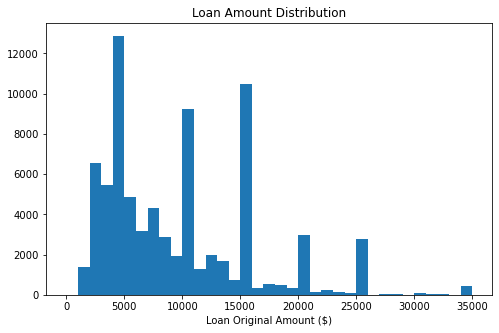

In [53]:
# I will start with a standard scaled plot
binsize = 1000
bins = np.arange(0, df_loan_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data= df_loan_clean, x= 'LoanOriginalAmount', bins=bins)
plt.xlabel("Loan Original Amount ($)")
plt.title("Loan Amount Distribution")
plt.show()

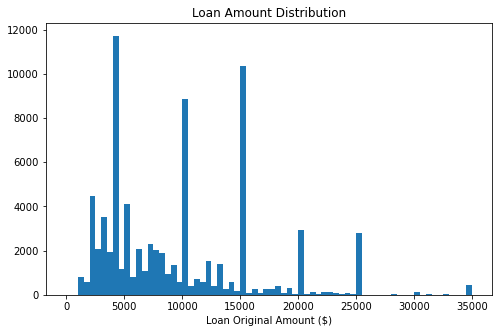

In [54]:
# investigating further on a smaller binsize
binsize = 500
bins = np.arange(0, df_loan_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data= df_loan_clean, x= 'LoanOriginalAmount', bins=bins)
plt.xlabel("Loan Original Amount ($)")
plt.title("Loan Amount Distribution")
plt.show()

### Observation

There is a spike between 0-5k, 10k-15k, 15k-20k(All in dollars). This shows that the loan is given in multiples of 5k and as a rounded figure. Also, i observed from the plot that majority of the loan seems to have been disbursed at 4k, 10k and 15k causing the distribution to be somewhat tri-modal.

### Question 2

Take a look at one of the predictor variable of interest, StatedmonthlyIncome.

### Visualization

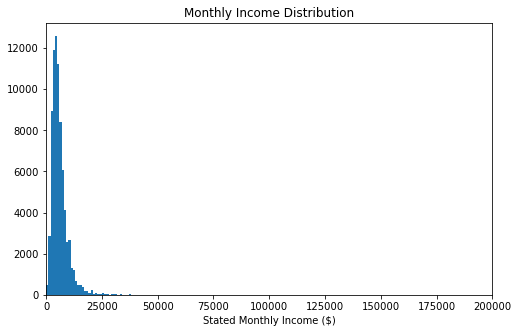

In [56]:
# Start with a standard scaled plot
binsize = 1000
bins = np.arange(0, df_loan_clean['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data= df_loan_clean, x= 'StatedMonthlyIncome', bins=bins)
plt.xlabel("Stated Monthly Income ($)")
plt.title("Monthly Income Distribution")
plt.xlim(0, 200000)
plt.show()

The plot above shows a only one major spike. This can be because of the presence of outlier. To investigate further, I will go ahead to plot using seaborn's boxplot.

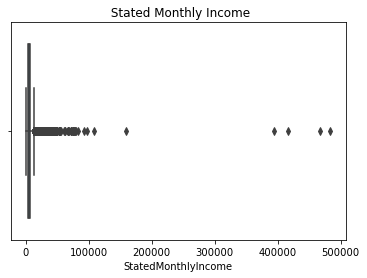

In [57]:
sb.boxplot(data=df_loan_clean, x='StatedMonthlyIncome')
plt.title(' Stated Monthly Income');

The extended dots in the boxplot above shows that there are outliers.
I will use the IQR to detect and further trim these outliers.

In [59]:
# Using IQR method to detect outliers
Q1 = df_loan_clean['StatedMonthlyIncome'].quantile(0.25)
Q3 = df_loan_clean['StatedMonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1

#Data which falls below the lower and above the upper limit is an outlier
LowerLimit = Q1 - 1.5*IQR  
UpperLimit = Q3 + 1.5*IQR  
print(LowerLimit, UpperLimit)

-1918.0 12618.0


In [60]:
# Print the shape before transformation
print('The shape before removing outliers: ', df_loan_clean.shape )

The shape before removing outliers:  (77543, 20)


In [64]:
# checking out both low and high outliers
low_outliers = df_loan_clean['StatedMonthlyIncome'] < LowerLimit
print(low_outliers.sum())

0


In [63]:
high_outliers = df_loan_clean['StatedMonthlyIncome'] > UpperLimit
print(high_outliers.sum())

3508


In [65]:
# as the outliers can only be found with data above the upperlimit, we will transform to remove these outliers.
df_loan_clean = df_loan_clean[df_loan_clean['StatedMonthlyIncome'] < UpperLimit]

In [66]:
# New shape
print('The new shape after transforming is: ', df_loan_clean.shape)

The new shape after transforming is:  (74035, 20)


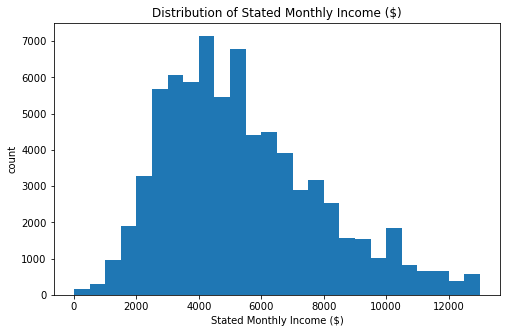

In [69]:
# plotting with trimmed data

binsize = 500
bins = np.arange(0, df_loan_clean['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('count')
plt.title('Distribution of Stated Monthly Income ($)');
plt.show()

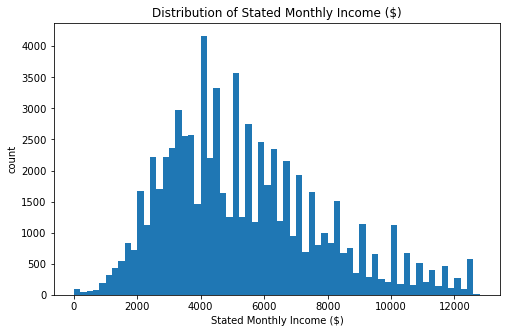

In [71]:
# Investigating further with a reduced binsize
binsize = 200
bins = np.arange(0, df_loan_clean['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'StatedMonthlyIncome', bins=bins)
plt.xlabel('Stated Monthly Income ($)')
plt.ylabel('count')
plt.title('Distribution of Stated Monthly Income ($)');
plt.show()

### Observation

The first plot for the StatedMonthlyIncome shows that more low income range had more loans. after removing the outliers, I noticed that there is an interesting spike at the income amount of 4,000(dollars).

We also notice a little peak at 0 which could represent people that are unemployed.

### Question 3

Let us check out another predictor variable of interest, DebtToIncomeRatio

### Visualization

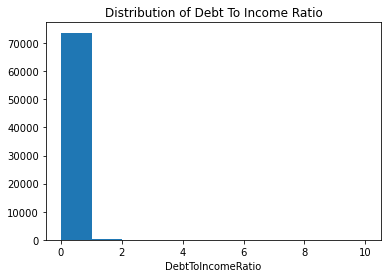

In [73]:
# A simple histogram plot
plt.hist(data=df_loan_clean, x='DebtToIncomeRatio')
plt.title('Distribution of Debt To Income Ratio')
plt.xlabel('DebtToIncomeRatio');

In [74]:
# The plot seems to be heavily moved to the right
# let's check out the description of the data and plot on a standard scaled plot
df_loan_clean['DebtToIncomeRatio'].describe()

count    74035.000000
mean         0.263610
std          0.322497
min          0.010000
25%          0.160000
50%          0.230000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

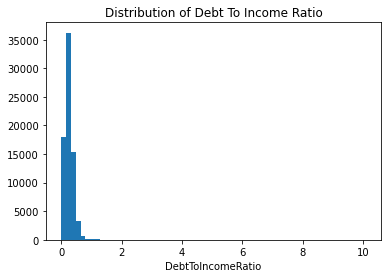

In [75]:
# A standard scaled plot
binsize = 0.16
bins = np.arange(0, df_loan_clean['DebtToIncomeRatio'].max()+binsize, binsize)

plt.hist(data=df_loan_clean, x='DebtToIncomeRatio', bins=bins)
plt.title('Distribution of Debt To Income Ratio')
plt.xlabel('DebtToIncomeRatio');

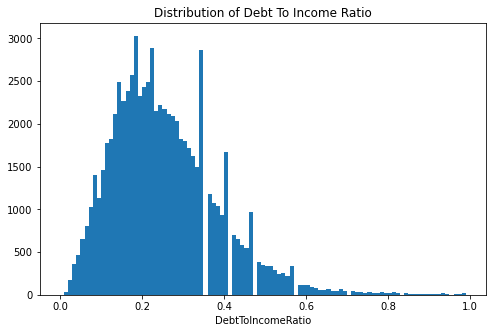

In [80]:
# Investigating further on a smaller binsize
bins= np.arange(0, 1, 0.01)

plt.figure(figsize=(8,5))
plt.hist(data=df_loan_clean, x='DebtToIncomeRatio', bins=bins)
plt.title('Distribution of Debt To Income Ratio')
plt.xlabel('DebtToIncomeRatio');

### Observation

It seems that generally, lenders prefer a debt to income ratio of about 0.36(36%) or lesser and there seems to be a threshold at 50%. 

As seen from the plot, the spikes at 0.2 and 0.36 would suggest that majority of the borrowers have debt to income ratio that falls below the threshold.

### Question 4

What Income range has the most loans?

### Visualization

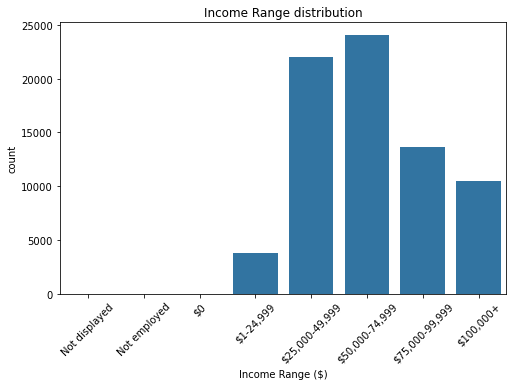

In [83]:
plt.figure(figsize=[8, 5])
sb.countplot(x=df_loan_clean['IncomeRange'], color=base_color);
plt.title('Income Range distribution');
plt.xlabel('Income Range ($)');
plt.xticks(rotation=45);

### Observation

From the plot, majority of the borrowers earn between in the income range of 25,000 and 75,000 dollars.

### Question 5

Next up, I will take a look at the loan term

### Visualization

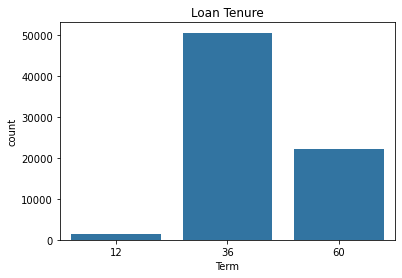

In [84]:
sb.countplot(x=df_loan_clean['Term'], color=base_color);
plt.title('Loan Tenure');

### Observation

From the plot, majority of the loan has a tenure(term) of 36 months(3 years)

### Question 6

What is the monthly repayment like?

### Visualization

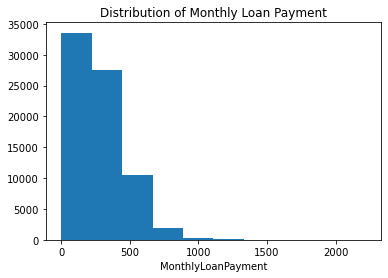

In [85]:
# Plotting a simple histogram
plt.hist(data=df_loan_clean, x='MonthlyLoanPayment')
plt.title('Distribution of Monthly Loan Payment')
plt.xlabel('MonthlyLoanPayment');

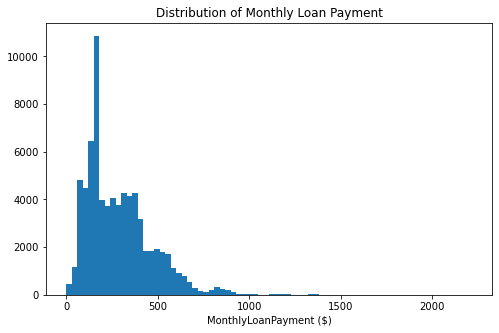

In [87]:
# plotting on a standard scaled plot
binsize = 30
bins = np.arange(0, df_loan_clean['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan_clean, x = 'MonthlyLoanPayment', bins = bins);
plt.xlabel('MonthlyLoanPayment ($)');
plt.title('Distribution of Monthly Loan Payment');
plt.show()

### Observation

The variable has a unimodal plot with more of the monthly repayment between 0 to 500 and majority paying approximately 200 or 250.

The plot also shows that there a few people not paying monthly at all.

### Question 7

I will take a look at the Prosper score to see how risky the loans are

### Visualization

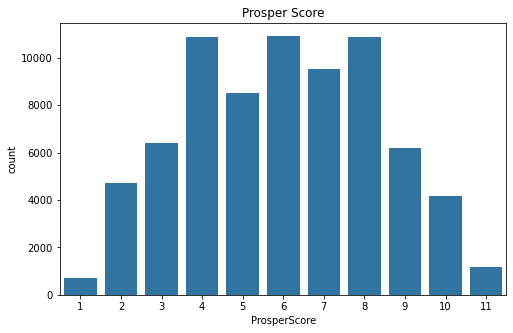

In [90]:
plt.figure(figsize=[8, 5])
sb.countplot(x=df_loan_clean['ProsperScore'], color=base_color)
plt.title('Prosper Score');

### Observation

The ideal/best (low) risk score is said to be 10. However, the prosper score which is the risk measuring criteria has a somewhat trimodal plot with spikes at 4, 6, 8. 

### Question 8

We will take a look at some other variable in the dataset. first off will be the nominal variables

### Visualization

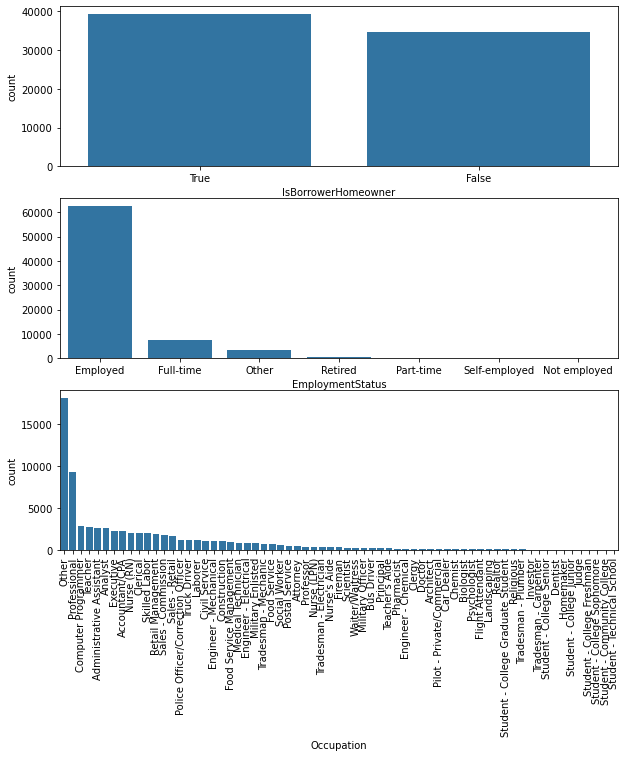

In [92]:
fig, ax = plt.subplots(nrows=3, figsize = [10,10])

base_color = sb.color_palette()[0]
sb.countplot(data = df_loan_clean, x = 'IsBorrowerHomeowner', order = df_loan_clean['IsBorrowerHomeowner'].value_counts().index, 
             color = base_color, ax = ax[0])
sb.countplot(data = df_loan_clean, x = 'EmploymentStatus', order = df_loan_clean['EmploymentStatus'].value_counts().index,
             color = base_color, ax = ax[1])
sb.countplot(data = df_loan_clean, x = 'Occupation', order = df_loan_clean['Occupation'].value_counts().index, 
             color = base_color, ax = ax[2])
plt.xticks(rotation=90);

plt.show()

### Observation

Majority of the borrowers are homeowners.

Also a very large proportion of the borrowers are employed.

The top occupations of these borrowers includes, Professionals, computer Programmer with majority undisclosed(others) which could be indicative of entrepreneurs

### Question 9

What are the Ordinal variables like

### Visualization

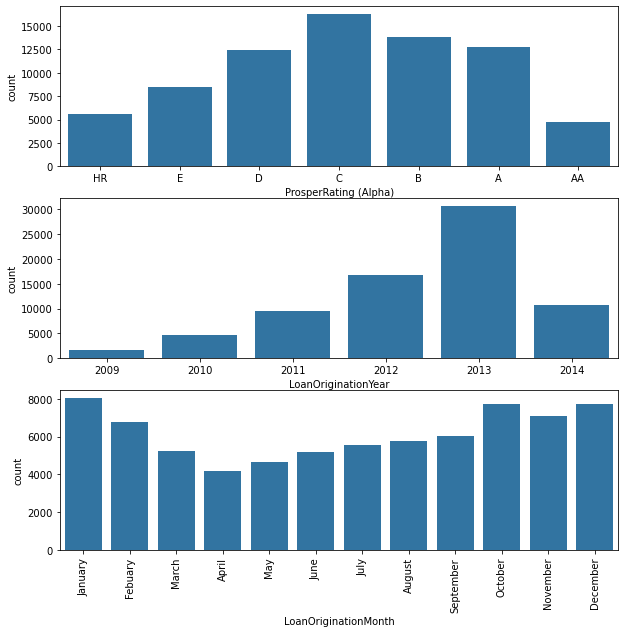

In [93]:
fig, ax = plt.subplots(nrows=3, figsize = [10,10])

base_color = sb.color_palette()[0]
sb.countplot(data = df_loan_clean, x = 'ProsperRating (Alpha)', color = base_color, ax = ax[0])
sb.countplot(data = df_loan_clean, x = 'LoanOriginationYear', color = base_color, ax = ax[1])
sb.countplot(data = df_loan_clean, x = 'LoanOriginationMonth', color = base_color, ax = ax[2])
plt.xticks(rotation=90);

plt.show()

### Observation

Most risk rating have a Prosper Rating of C which indicates that most loans have the average risk rating.

More loans orginated in 2013 as compared to other years which brings the question of why and what are the factors that caused this year to be different from other years which i am most curious to explore further.

We have more loans taken in January and February and other months a slightly similar proportion of loans until October, November and December.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The loan origination year has a very interesting peak in the loan distribution in the year 2013.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> While checking out the stated monthly income, some outliers were noticed when plotted on a box plot and these oints were seen to be very far off from other points. The outliers were removed for clarity purpose and so as not to distract the visualization.

> The debt to income ratio was very skewed towards the right and to dicover very interesting insights, the data was plotted on a scaled using smaller bins to discover very interesting insights

## Bivariate Exploration

> In this section, i will investigate relationships between pairs of variables previously introduced in the univariate exploration.

### Question 10

I will start by looking at a pairwise corelations of some of the features in the data set

### Visualization

In [95]:
# pairing of the variables between catrgorial and numerical
numerical_var = ['LoanOriginalAmount', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'Term', 'EmploymentStatusDuration', 'MonthlyLoanPayment']
categoric_var = ['ProsperScore', 'ProsperRating (Alpha)','EmploymentStatus', 'IsBorrowerHomeowner', 'LoanStatus']

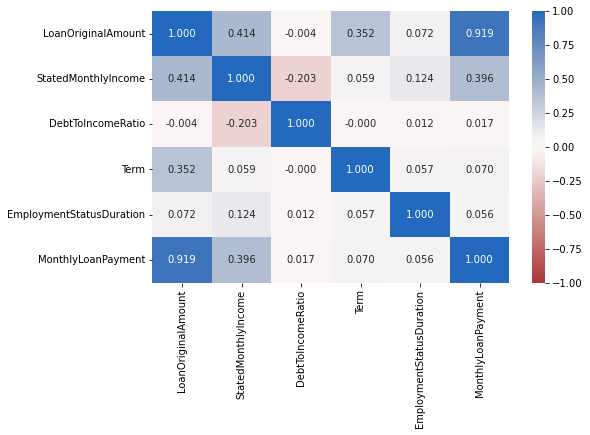

In [99]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_loan_clean[numerical_var].corr(), vmin = -1, vmax = 1, annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

### Observation

There is high positive corelation between loan original amount and monthly loan payment (0.919)

There is a weak positive corelation between stated monthly income and monthly loan payment (0.396)

There is no corelation between Debt to income ratio and loan original amount.

There is a weak positive corelation between term and loan original amount (0.352)


### Question 11

Using scatter plot, i will now take another look at the corelation of different variables

df_loan_clean.shape= (74035, 20)


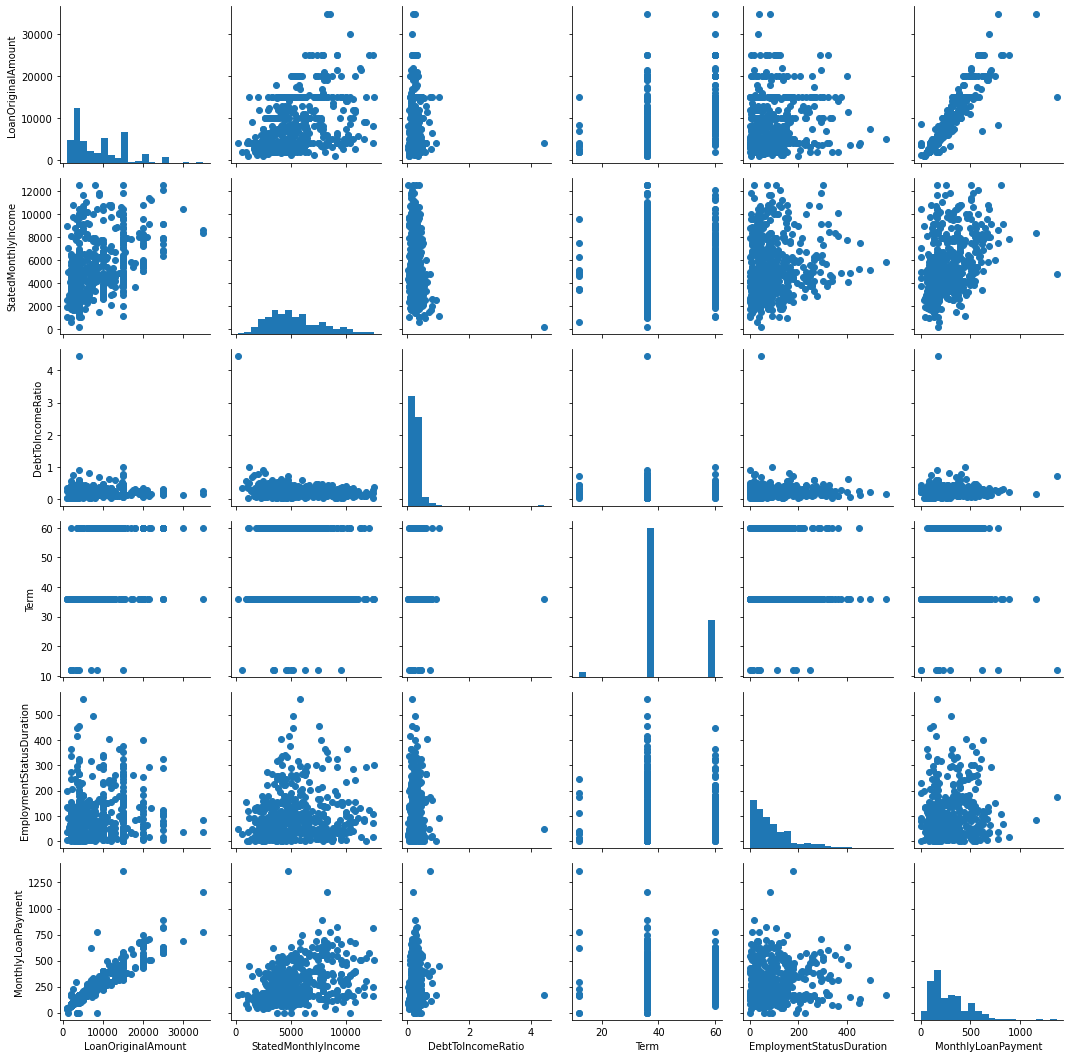

In [106]:
# Plotting using random sample size
# This is to allow the code run faster and properly view the plot

df_loan_samp = df_loan_clean.sample(n=500, replace = False)
print("df_loan_clean.shape=",df_loan_clean.shape)

g = sb.PairGrid(data = df_loan_samp, vars = numerical_var)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

### Observation

As expected, loan original amount and monthly loan payment have a strong positive corelation as i assume that the more loan given, the greater the amount that is expected as repayment monthly.

We also see a positive relationship between stated monthly income and loan original amount. Lenders are more than likely to loan to borrowers with monthly income.

### Question 12

I will take a look at how the loan original amount and stated monthly income corelate with categorical variable

### Visualization

/Users/chimamakachilaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 1080x1080 with 0 Axes>

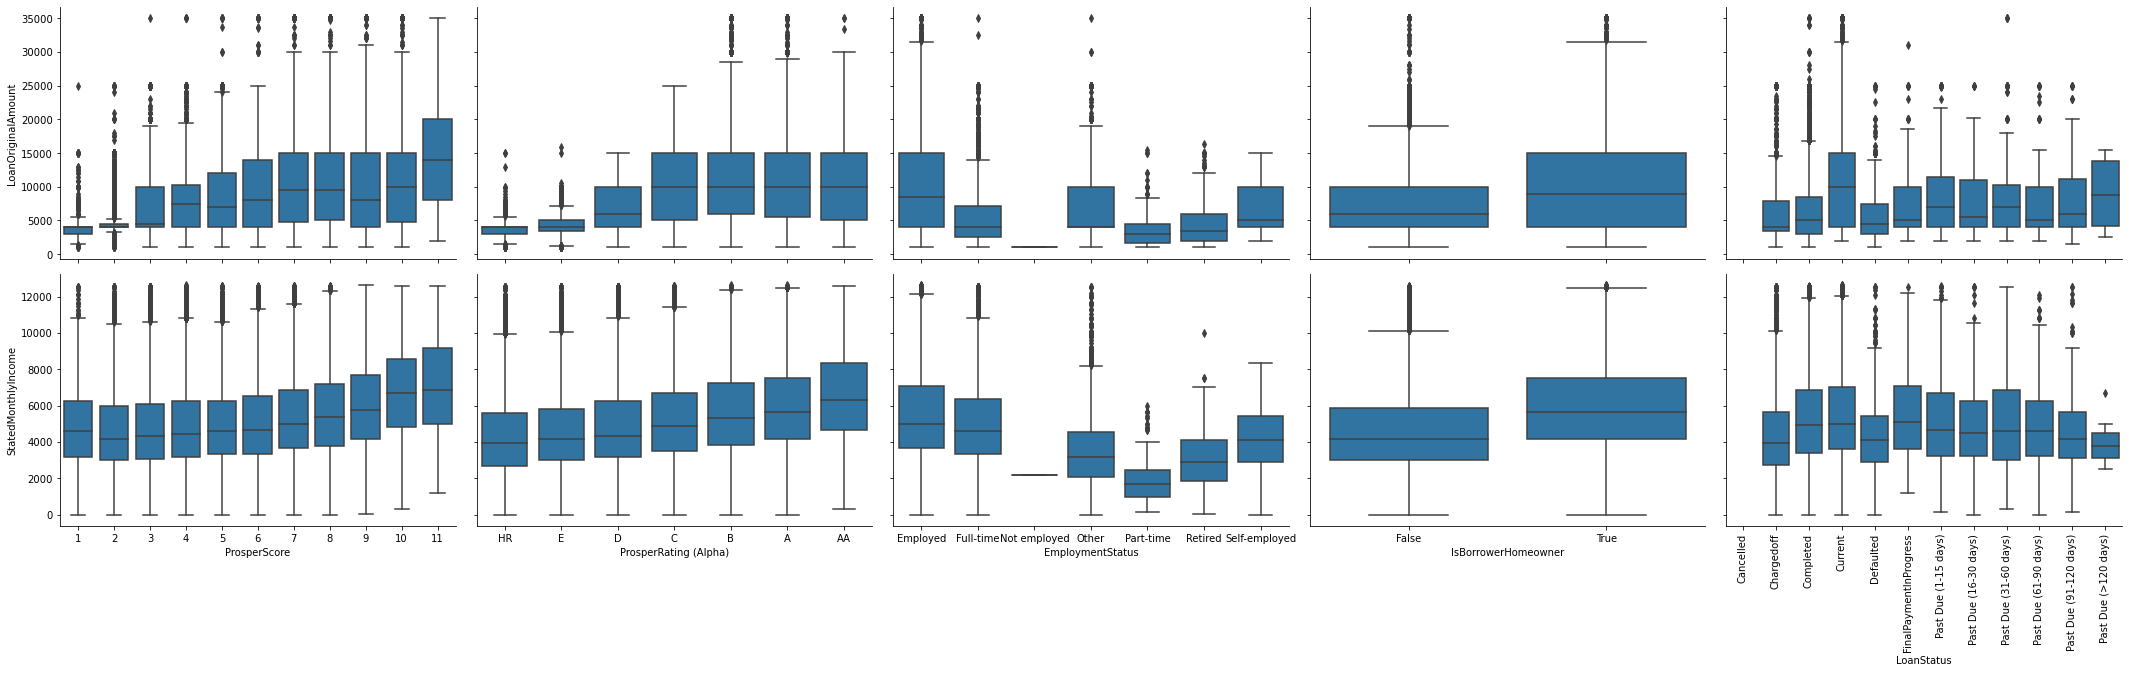

In [111]:
# plot matrix of numeric features against categorical features.
# using a larger sample size

df_loan_samp = df_loan_clean.sample(n=2000, replace = False)

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color = default_color)

plt.figure(figsize = [15, 15])
g = sb.PairGrid(data = df_loan_clean, y_vars = ['LoanOriginalAmount', 'StatedMonthlyIncome'], x_vars = categoric_var,
                size = 4, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation=90)
plt.show();

### Observation

There is an interesting corelation between the numeric variable and categorical variable.

People that are employed have more stated monthly income as expected and receive more loans. Home owners also tend to receive more loans.

Also borrowers with the best/low risk tend to get more loans and also have more stated monthly income.

### Question 13

Let's take a look at the relationship between categorical variables.

### Visualization

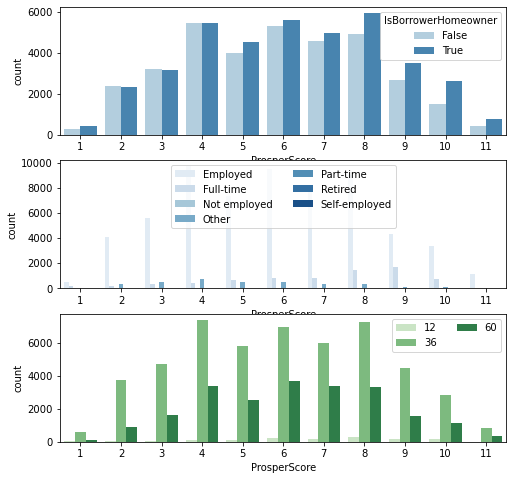

In [115]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [8, 8])

# subplot 1: ProsperScore vs IsBorrowerHomeowner
plt.subplot(3, 1, 1)
sb.countplot(data = df_loan_clean, x = 'ProsperScore', hue = 'IsBorrowerHomeowner', palette = 'Blues')

# subplot 2: ProsperScore vs. EmploymentStatus
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_loan_clean, x = 'ProsperScore', hue = 'EmploymentStatus', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: ProsperScore vs. Term, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_loan_clean, x = 'ProsperScore', hue = 'Term', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping

plt.show()

### Observation

In all the plot, it is intersesting to note that all there are more borrowers below the ideal ProsperScore of 10.

### Question 14

I want to dig further to check out the more of the relationships between variables. 
 First, i will take a look at LoanOriginalAmount compared to StatedMonthlyIncome

### Visualization

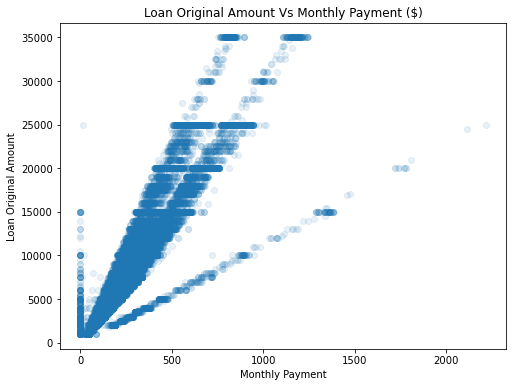

In [119]:
# scatter plot of LoanOriginalAmount vs. MonthlyLoanPayment, with log transform on price axis

plt.figure(figsize = [8, 6])
plt.scatter(data = df_loan_clean, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', alpha = 1/10)
plt.xlabel('Monthly Payment')
plt.ylabel('Loan Original Amount')
plt.title('Loan Original Amount Vs Monthly Payment ($)')
plt.show()

### Observation

There is a positive corelation between LoanOriginalAmount and MonthlyLoanPayment which could stem from the fact that the repayment amount is calculated from the Loan amount and more loan will most likely have a higher amount when calculated.

Despite the positive relationship, the plot is split in three parts which could mean that there is a categorical variable affecting this.

### Question 15

Let's check out the corelation between StatedMonthlyIncome and LoanOriginalAmount

### Visualization

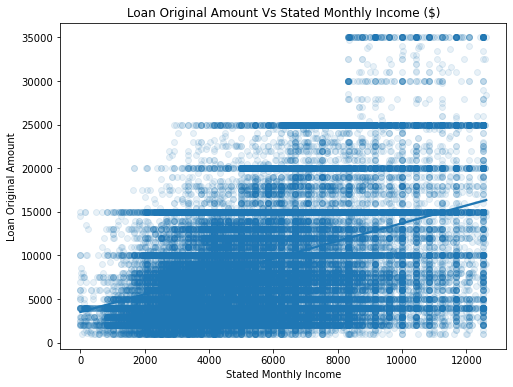

In [123]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df_loan_clean, x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', 
            x_jitter=0.3, scatter_kws=({'alpha': 1/10}))
plt.xlabel('Stated Monthly Income')
plt.ylabel('Loan Original Amount')
plt.title('Loan Original Amount Vs Stated Monthly Income ($)')
plt.show()

### Observation

I noticed that borrowers with income greater than 8000, there is a high chance of getting higher loans while income below 8000, the borrowers have a probability of either getting high or low.

### Question 16

Will having a home increase loan amount?

### Visualization

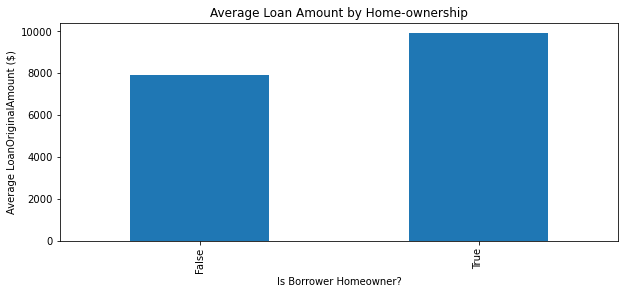

In [124]:
plt.figure(figsize=[8,6])
df = df_loan_clean.groupby('IsBorrowerHomeowner').mean()['LoanOriginalAmount']

df_fig = df.plot(kind='bar', title="Average Loan Amount by Home-ownership",
          figsize = (10,4), color=base_color)
#Set axis labels for the df_fig plot
df_fig.set(xlabel='Is Borrower Homeowner?',
       ylabel='Average LoanOriginalAmount ($)');

### Observation

Looks like that borrowers that are homeowners get more loan. Most likely because in the event of default, lenders have the borrower's homes as collateral.

### Question 17

How does ProsperScore affect loans?

### Visualization

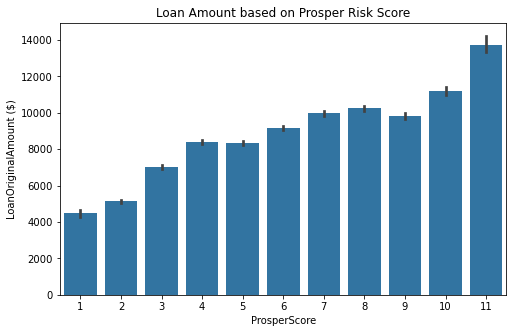

In [126]:
plt.figure(figsize=[8,5])

sb.barplot(data=df_loan_clean, x='ProsperScore', y='LoanOriginalAmount', color=base_color)
plt.ylabel('LoanOriginalAmount ($)');
plt.title('Loan Amount based on Prosper Risk Score');

### Observation

Low risk borrowers will get more loans as indicated by the plot which shows that as ProsperScore moves ups towards the ideal score, amount of loans given increases.

### Question 18

What Occupation gets the highest loan amount?

### Visualization

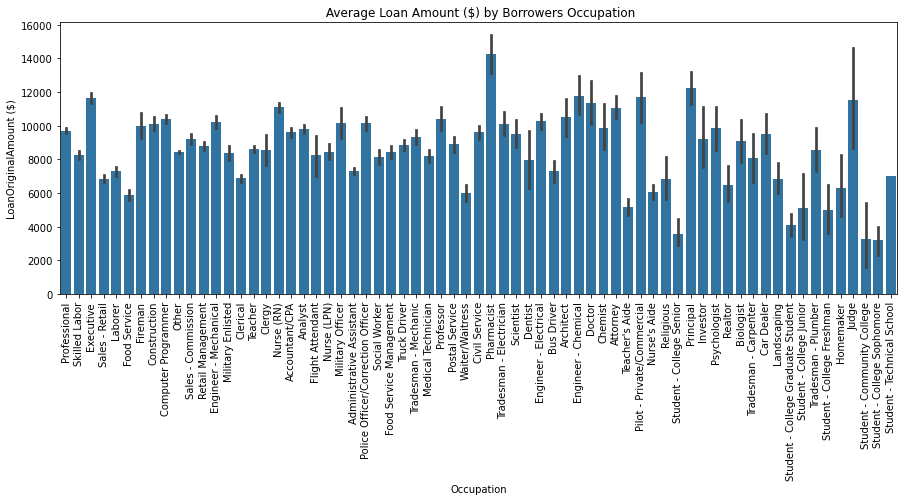

In [129]:
plt.figure(figsize=[15,5])

sb.barplot(data=df_loan_clean, x='Occupation', y='LoanOriginalAmount', color=base_color)
plt.ylabel('LoanOriginalAmount ($)')
plt.title(' Average Loan Amount ($) by Borrowers Occupation')
plt.xticks(rotation=90);

### Observation

Some of the top occupation with the highest loan amount inlcudes, Pharmacist, Judge, Principal, Engineer-Chemical. This could mean that these jobs have more monthly income or better risk rating

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>There is a positive corelation between Monthly Income and Loan Original amount. Borrowers with higher income tend to have more loan amount given as compared to lower monthly income earners where the chances of getting either low or high loan amount remains the same


> I noticed something interesting between the loan amount and some of the categorical variable. Lenders were more likely to give more loan amount to borrowers with a home who are also employed and have a low risk rating.

> The loan original amount when plotted against the Monthly loan payment showed a positive relationship that can be described as a linear relationship given that the scatter plot showed 3 positive lines

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> When looking at the corelation between some of the categorical variable, I noticed that the all the plot when plotting some variables against the ProsperScore had a centered plot. This could mean that there are few borrowers with the perfect risk rating or loans technically are high risk ventures.

## Multivariate Exploration

> What I would explore in this part of my analysis is how some of my categorical variable plays into LoanOriginalAmount and MonthlyLoanPayment

### Question 19

Does the term of the loan affect monthlyloanpayment and loanoriginalamount?

### Visualization

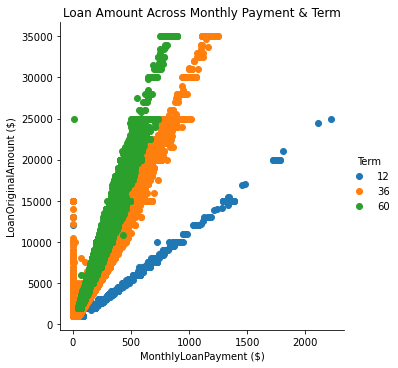

In [144]:
g = sb.FacetGrid(data = df_loan_clean, hue = 'Term', height = 5)

g.map(plt.scatter, 'MonthlyLoanPayment', 'LoanOriginalAmount');
plt.title('Loan Amount Across Monthly Payment & Term')
plt.xlabel('MonthlyLoanPayment ($)');
plt.ylabel('LoanOriginalAmount ($)')
g.add_legend();

### Observation

As suspected, a the three lines noticed are being caused by a categorical variable. the term of the loan does affect the monthly loan payment and loan original amount.

I observed that borrowers with a shorter term(12 months) tend to have a higher monthly payment that borrowers with longer term.

### Question 20

Does the isHomeOwner status and Employment staus affect Loan amount?

### Visualization

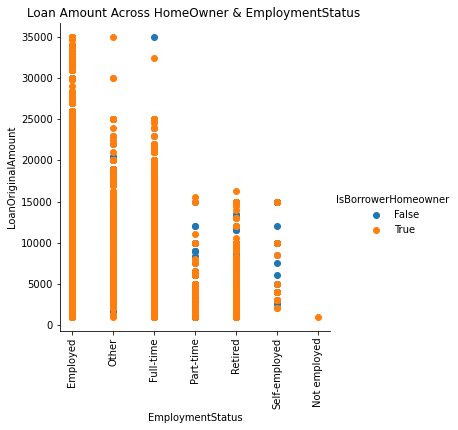

In [141]:
g = sb.FacetGrid(data = df_loan_clean, hue = 'IsBorrowerHomeowner', height = 5)

g.map(plt.scatter, 'EmploymentStatus', 'LoanOriginalAmount')
plt.title('Loan Amount Across HomeOwner & EmploymentStatus ')
plt.xticks(rotation=90)
g.add_legend();

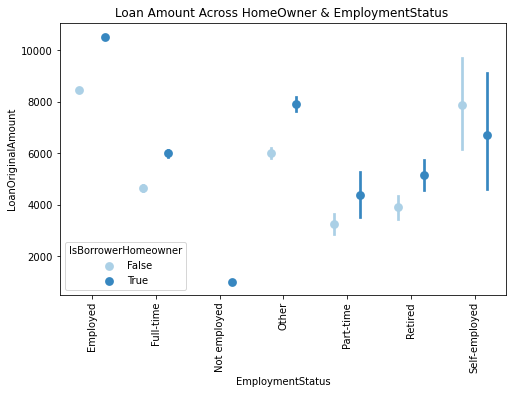

In [142]:
## Plot using seaborn point plot
fig = plt.figure(figsize = [8,5])
ax = sb.pointplot(data = df_loan_clean, x = 'EmploymentStatus', y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Amount Across HomeOwner & EmploymentStatus ')
plt.ylabel('LoanOriginalAmount')
plt.xlabel('EmploymentStatus')
plt.xticks(rotation=90)
plt.show();

### Observation

For every time the borrower owns a home amongst the different employment status, the Loan amount given is always more than when the borrower doe not have a home. This could mean that the lender is more comfortable to give borrowers who own homes more loan amount possibly using their home as collateral.

For the self-employed status however, we see an interesting point. regardless of home owner status, lenders still give more loans to persons that are self employed could mean business men, freelancers etc but still remains just speculations.

### Question 21

How does Term and ProsperScore affect LoanOriginalAmount

### Visualization

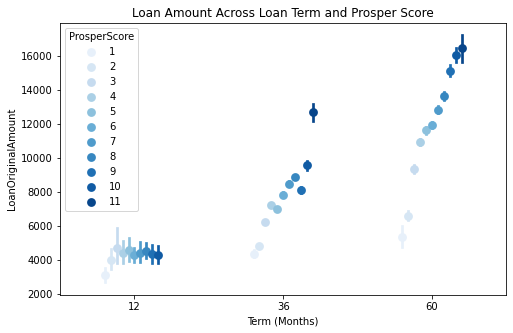

In [143]:
fig = plt.figure(figsize = [8,5])
ax = sb.pointplot(data = df_loan_clean, x = 'Term', y = 'LoanOriginalAmount', hue = 'ProsperScore',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Loan Amount Across Loan Term and Prosper Score')
plt.ylabel('LoanOriginalAmount')
plt.xlabel('Term (Months)')
plt.show();

### Observation

For every loan term, borrowers with lower risk rating are given more loan amount.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is a positive corelation between Monthly loan payment and Loan Original amount. The term of the loan also has an important role to play in the amount of Monthly payment. The higher the Term the lesser the Monthly Payment and vice versa. It's also interesting to note that larger Loan Amounts are issued out for longer term.

> When comparing the loan amount against the Term and ProsperScore, I noticed that more loan amount are given to Borrowers with Term of 36 months with low risk rating.

> I discovered that being a homeowner increases the chances of getting a higher loan amount and this was also influenced by the employement status of the borrower as even though a borrower has a home, being unemployed greatly reduces the chance of getting a high loan amount.

### Were there any interesting or surprising interactions between features?

> I would not say that there was something really surprising but I can say that having loan Term as a defining factor in the loan amount was not a little more than i initially thought.

## Conclusions
#### Steps taken during Data Exploration

1. The data was downloaded from the classroom project walkthrough and imported into my Jupyter notebook after looking at the data dictionary to have a working knowledge of the variables. I performed some preliminary wrangling, assessment and cleaning.



2. Next step was to filter and subset the data to contain only the variables that i was most interested in exploring further.



3. The first phase of the visualization was The Univariate plotting, where i explored the distribution of my main variable of interest such and Stated Monthly Income, Loan Original Amount and some other variables which are believe could have influence on my main variables.



4. Next up was the Bivariate plotting where i used a standard heat map to show the corelation between numerical variables then a scatter plot of variable using sample data size(for ease of plotting)to explore further. I also plotted a matrix plot grid to see how the Numerical variables (particularly Loan Amount) were affected by the Categorical variables and also the relationship amongst categorical variables where i noticed that most of the loans are below the ideal sore of 10.



5. I plotted individually some of the relationship between Loan original amount and some categorical variable such as Occupation, IsBorrowerHomeowner and prosperscore. where it is interesting to note that these categorical variable influences Loan original amount.



6. Finally in the multivariate plotting, we tried to figure out if there were some features that strengthens the relationships observed in the Bivariate analysis. In this i discovered that Term really is a defining factor in Loan amount and Monthly loan payment as well a Employment status and Prosperscore.


#### Summary

1. In the year 2013, there is surprisingly a large amount of loan given compared to other years and the surge months includes January, Febuary and towards the year. More loan are given for 36 or 60 months Term with 36 months having the highest loan amount.



2. To have more chances of getting a higher loan amount, the Borrower should be able to have a home and Employed with their Debt-to-income ratio less than 0.50 as i noticed that most loans had the ratio of 0.36 with a threshold somewhat at 0.50.



3. Having a good prosper score(risk rating) also gives an edge in borrowing higher amounts.